**TABLE OF CONTENTS**
1. Data Exploration
  
    1.1. Imports

    1.2. Exploring Dataset

    1.3. Variable Analysis
2. Data Cleaning

    2.1.Missing Data

    2.2.Duplicate Data

    2.3.Detection of Outliers – IQR approach
3. Feature Engineering

    4.1 Correlation Analysis

    4.2. Feature Encoding
4. Model Training
5. Model Evaluation and Tuning(Hyper-parameter tuning(HPs-T))

Bonus: Feature importance evaluation



#####**VARIABLES:**
- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase

##1. EXPLORATORY DATA ANALYSIS(EDA)

####1.1. Imports

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
from datetime import datetime as dt

# modelling libraries
!pip install xgboost
!pip install lightgbm
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import  XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ignoring warnings
from warnings import filterwarnings
filterwarnings('ignore', category = DeprecationWarning)
filterwarnings('ignore', category = FutureWarning)

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option('display.max_rows', None)

In [ ]:
marketing_df = pd.read_csv('/content/marketing_campaign.csv', sep=";")
df = marketing_df.copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


####1.2.Exploring Dataset

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
ID,2240.000000,5592.159821,3246.662198,0.000000,2828.250000,5458.500000,8427.750000,11191.000000
Year_Birth,2240.000000,1968.805804,11.984069,1893.000000,1959.000000,1970.000000,1977.000000,1996.000000
Income,2216.000000,52247.251354,25173.076661,1730.000000,35303.000000,51381.500000,68522.000000,666666.000000
Kidhome,2240.000000,0.444196,0.538398,0.000000,0.000000,0.000000,1.000000,2.000000
Teenhome,2240.000000,0.506250,0.544538,0.000000,0.000000,0.000000,1.000000,2.000000
Recency,2240.000000,49.109375,28.962453,0.000000,24.000000,49.000000,74.000000,99.000000
MntWines,2240.000000,303.935714,336.597393,0.000000,23.750000,173.500000,504.250000,1493.000000
MntFruits,2240.000000,26.302232,39.773434,0.000000,1.000000,8.000000,33.000000,199.000000
MntMeatProducts,2240.000000,166.950000,225.715373,0.000000,16.000000,67.000000,232.000000,1725.000000
MntFishProducts,2240.000000,37.525446,54.628979,0.000000,3.000000,12.000000,50.000000,259.000000


In [ ]:
# Z_CostContact and Z_Revenue variables don't carry information so we can drop these
df.drop('Z_CostContact', inplace=True, axis=1)
df.drop('Z_Revenue', inplace=True, axis=1)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.00,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [ ]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2235,10870,1967,Graduation,Married,61223.00,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.00,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.00,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.00,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0
2239,9405,1954,PhD,Married,52869.00,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,1


In [ ]:
# to check data balance
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

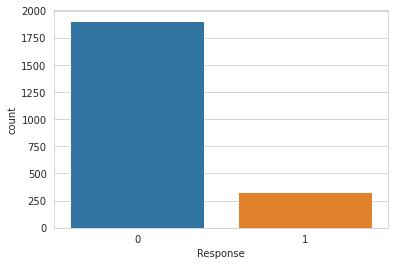

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Response',data=df);

In [ ]:
# There is imbalanced distribution
# Imblance class : Moderate (%1-%20)
(df[(df.Response == 1)].count()[0]/df[(df.Response == 0)].count()[0])*100

17.523609653725078

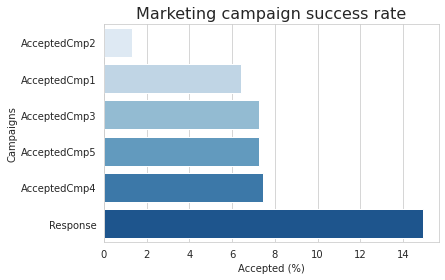

In [ ]:
# to calculate success rate for each campaign
campaign_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()

# plot
sns.barplot(x='Percent', y='index', data=campaign_success.sort_values('Percent'), palette='Blues')
plt.xlabel('Accepted (%)')
plt.ylabel('Campaigns')
plt.title('Marketing campaign success rate', size=16);

In [ ]:
df['Education'].value_counts().to_frame('Count')

,Count
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


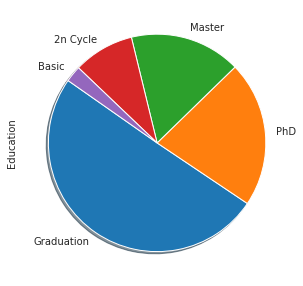

In [ ]:
# Visualizing the distribution of 'Education' variable in the dataset

df['Education'].value_counts().plot.pie(subplots=True, shadow = True, figsize=(5, 5), startangle=145);

In [ ]:
# to check the distribution of response by education variable
df[['Education','Response']].groupby('Education').agg({'Response':'value_counts'})

Response
Education  Response          
2n Cycle   0              181
           1               22
Basic      0               52
           1                2
Graduation 0              975
           1              152
Master     0              313
           1               57
PhD        0              385
           1              101

In [ ]:
df[['Education','Response']].groupby('Education').agg({'Response':'mean'}).round(2)

,Response
Education,
2n Cycle,0.11
Basic,0.04
Graduation,0.13
Master,0.15
PhD,0.21


In [ ]:
# Let's take a look at the income change by education level
df[['Education','Income']].groupby('Education').agg({'Income':'mean'}).round(2)

,Income
Education,
2n Cycle,47633.19
Basic,20306.26
Graduation,52720.37
Master,52917.53
PhD,56145.31


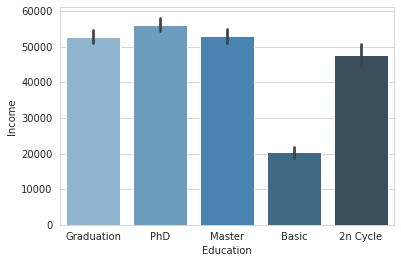

In [ ]:
sns.barplot(x=df['Education'], y=df['Income'], data=df,  palette="Blues_d");

####1.3.Variable Analysis

In [ ]:
# to find data types of columns
def grab_col_types(dataframe):
  """
  Returns the type of variables in the dataset
  """
  # to find obvious categorical variables
  cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]

  # to find numerical but categorical variables
  num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]
  cat_cols = cat_cols + num_but_cat

  # to find categorical but cardinal variables
  cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  print(f'Total Variables: {len(df.columns)}\n'
        f'Categorical columns: {len(cat_cols)}\n'
        f'Numerical columns: {len(num_cols)}\n'
        f'Categorical but cardinal columns: {len(cat_but_car)}\n'
        f'Numerical but categorical columns: {len(num_but_cat)}')

  return cat_cols, num_cols, cat_but_car, num_but_cat

In [ ]:
cat_cols, num_cols, cat_but_car_cols, num_but_cat = grab_col_types(df)

Total Variables: 27
Categorical columns: 11
Numerical columns: 15
Categorical but cardinal columns: 1
Numerical but categorical columns: 9


In [ ]:
cat_but_car_cols

['Dt_Customer']

In [ ]:
num_but_cat

['Kidhome',
 'Teenhome',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response']

NOTES:

We've learned more about the data types of columns.

[1] Dt_Customer column looks like categorical columns but it is not.

[2] 'Kidhome',
 'Teenhome',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain' and
 'Response' columns looks like numeric but they are categorical.

#####Visualization Categorical Variables

In [ ]:
# to visualize categorical columns
def cat_var_summary(df, col_name, plot=False):
  print(pd.DataFrame({col_name: df[col_name].value_counts(),
                        "Ratio": 100 * df[col_name].value_counts() / len(df)}))

  if plot:
    plt.figure()
    plt.title(col_name + ' Distribution')
    sns.barplot(x=df[col_name], y=df['Response'], data = df)
    plt.show(block=True)

            Education  Ratio
Graduation       1127  50.31
PhD               486  21.70
Master            370  16.52
2n Cycle          203   9.06
Basic              54   2.41


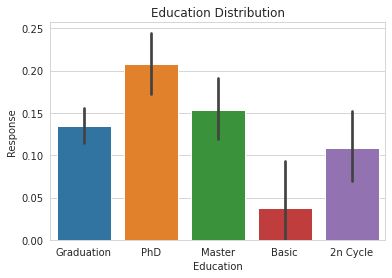

          Marital_Status  Ratio
Married              864  38.57
Together             580  25.89
Single               480  21.43
Divorced             232  10.36
Widow                 77   3.44
Alone                  3   0.13
Absurd                 2   0.09
YOLO                   2   0.09


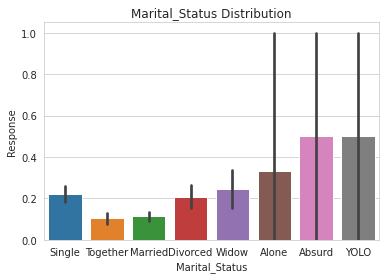

   Kidhome  Ratio
0     1293  57.72
1      899  40.13
2       48   2.14


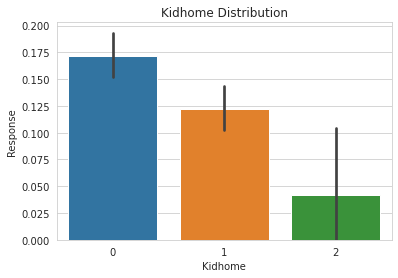

   Teenhome  Ratio
0      1158  51.70
1      1030  45.98
2        52   2.32


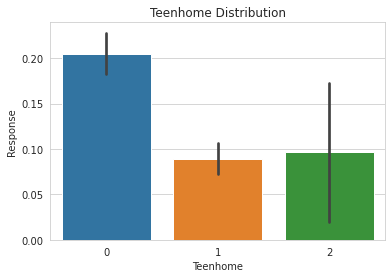

   AcceptedCmp3  Ratio
0          2077  92.72
1           163   7.28


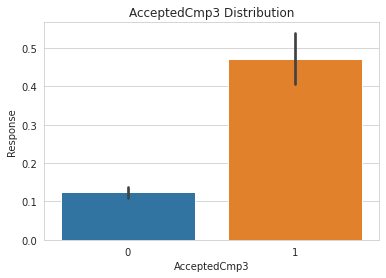

   AcceptedCmp4  Ratio
0          2073  92.54
1           167   7.46


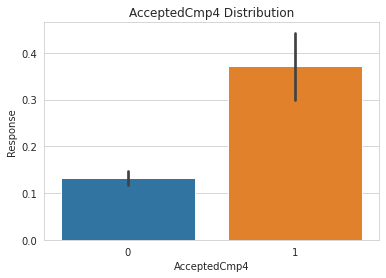

   AcceptedCmp5  Ratio
0          2077  92.72
1           163   7.28


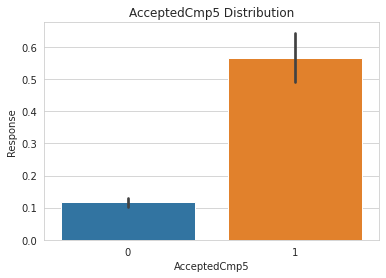

   AcceptedCmp1  Ratio
0          2096  93.57
1           144   6.43


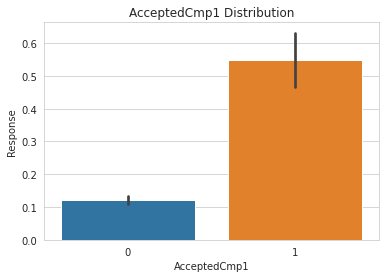

   AcceptedCmp2  Ratio
0          2210  98.66
1            30   1.34


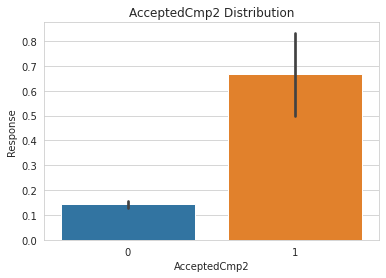

   Complain  Ratio
0      2219  99.06
1        21   0.94


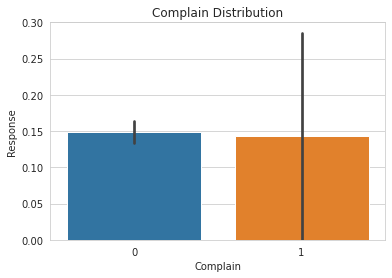

   Response  Ratio
0      1906  85.09
1       334  14.91


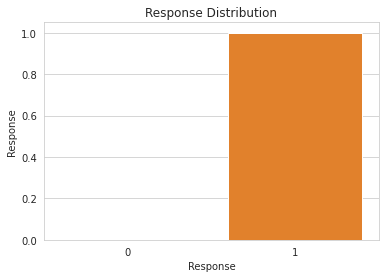

In [ ]:
# Let's visualize our categorical columns excluding booleans!
for col in cat_cols:
    if df[col].dtypes == "bool":
        print(f'{col} variable is boolean type!')
    else:
        cat_var_summary(df, col, plot=True)

#####Visualization Numerical Variables

In [ ]:
# to visualize numerical columns
def num_summary(df, numerical_col, plot=False):
    quantiles = [0.05, 0.15, 0.35, 0.50, 0.65, 0.80, 0.90, 0.95, 0.99]
    print(df[numerical_col].describe(quantiles).T)

    if plot:
        df[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count    2240.00
mean     5592.16
std      3246.66
min         0.00
5%        576.85
15%      1661.80
35%      3920.30
50%      5458.50
65%      7186.35
80%      9059.20
90%     10203.40
95%     10675.05
99%     11074.61
max     11191.00
Name: ID, dtype: float64


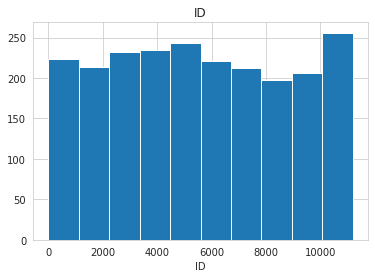

count   2240.00
mean    1968.81
std       11.98
min     1893.00
5%      1950.00
15%     1955.00
35%     1964.00
50%     1970.00
65%     1974.00
80%     1979.00
90%     1984.00
95%     1988.00
99%     1992.00
max     1996.00
Name: Year_Birth, dtype: float64


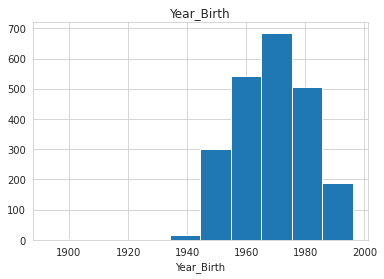

count     2216.00
mean     52247.25
std      25173.08
min       1730.00
5%       18985.50
15%      28427.00
35%      41417.50
50%      51381.50
65%      62060.25
80%      71819.00
90%      79844.00
95%      84130.00
99%      94458.80
max     666666.00
Name: Income, dtype: float64


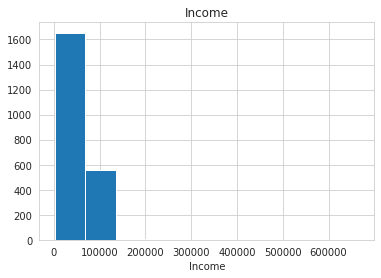

count   2240.00
mean      49.11
std       28.96
min        0.00
5%         4.00
15%       13.85
35%       34.00
50%       49.00
65%       64.00
80%       79.00
90%       89.00
95%       94.00
99%       98.00
max       99.00
Name: Recency, dtype: float64


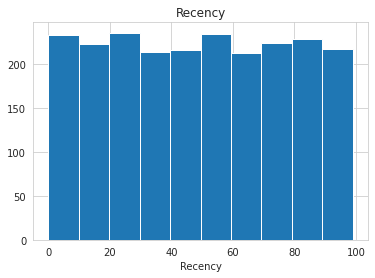

count   2240.00
mean     303.94
std      336.60
min        0.00
5%         3.00
15%       10.85
35%       53.00
50%      173.50
65%      356.35
80%      581.20
90%      822.10
95%     1000.00
99%     1285.00
max     1493.00
Name: MntWines, dtype: float64


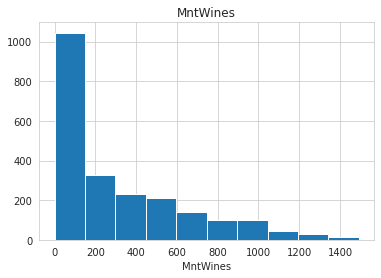

count   2240.00
mean      26.30
std       39.77
min        0.00
5%         0.00
15%        0.00
35%        3.00
50%        8.00
65%       19.00
80%       44.00
90%       83.00
95%      123.00
99%      172.00
max      199.00
Name: MntFruits, dtype: float64


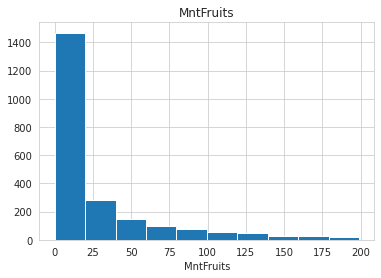

count   2240.00
mean     166.95
std      225.72
min        0.00
5%         4.00
15%        9.00
35%       26.00
50%       67.00
65%      135.00
80%      298.40
90%      499.00
95%      687.10
99%      915.00
max     1725.00
Name: MntMeatProducts, dtype: float64


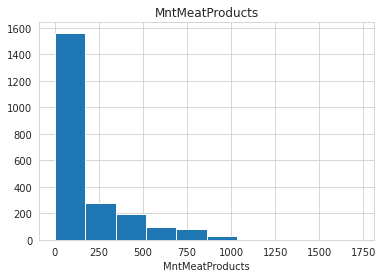

count   2240.00
mean      37.53
std       54.63
min        0.00
5%         0.00
15%        0.00
35%        4.00
50%       12.00
65%       28.00
80%       65.00
90%      120.00
95%      168.05
99%      226.22
max      259.00
Name: MntFishProducts, dtype: float64


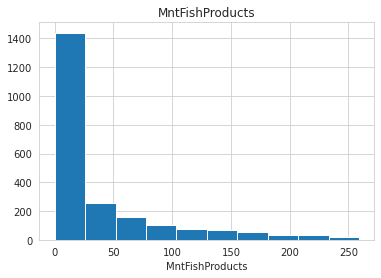

count   2240.00
mean      27.06
std       41.28
min        0.00
5%         0.00
15%        0.00
35%        3.00
50%        8.00
65%       19.00
80%       44.20
90%       89.00
95%      126.00
99%      177.22
max      263.00
Name: MntSweetProducts, dtype: float64


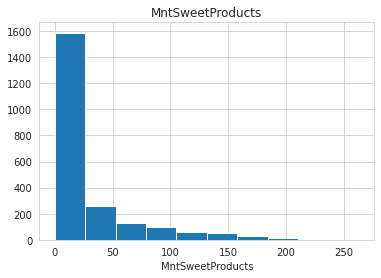

count   2240.00
mean      44.02
std       52.17
min        0.00
5%         1.00
15%        5.00
35%       14.00
50%       24.00
65%       40.00
80%       73.00
90%      122.00
95%      165.05
99%      227.00
max      362.00
Name: MntGoldProds, dtype: float64


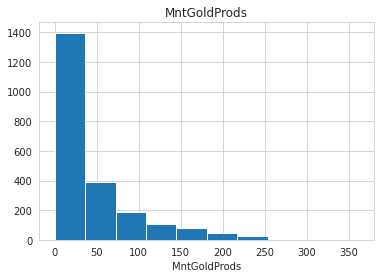

count   2240.00
mean       2.33
std        1.93
min        0.00
5%         1.00
15%        1.00
35%        1.00
50%        2.00
65%        2.00
80%        3.00
90%        5.00
95%        6.00
99%       10.00
max       15.00
Name: NumDealsPurchases, dtype: float64


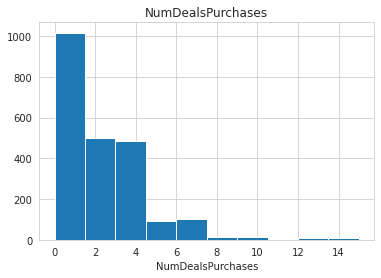

count   2240.00
mean       4.08
std        2.78
min        0.00
5%         1.00
15%        1.00
35%        3.00
50%        4.00
65%        5.00
80%        6.00
90%        8.00
95%        9.00
99%       11.00
max       27.00
Name: NumWebPurchases, dtype: float64


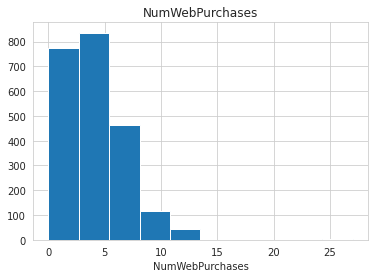

count   2240.00
mean       2.66
std        2.92
min        0.00
5%         0.00
15%        0.00
35%        1.00
50%        2.00
65%        3.00
80%        5.00
90%        7.00
95%        9.00
99%       10.61
max       28.00
Name: NumCatalogPurchases, dtype: float64


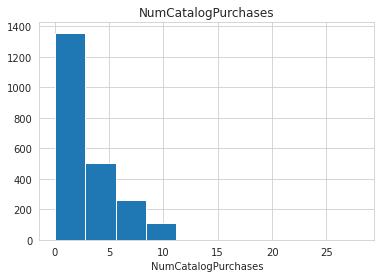

count   2240.00
mean       5.79
std        3.25
min        0.00
5%         2.00
15%        3.00
35%        4.00
50%        5.00
65%        7.00
80%        9.00
90%       11.00
95%       12.00
99%       13.00
max       13.00
Name: NumStorePurchases, dtype: float64


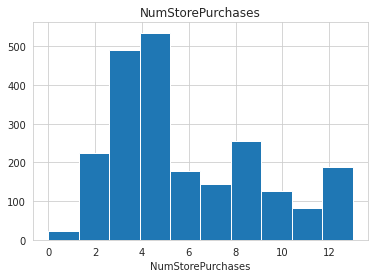

count   2240.00
mean       5.32
std        2.43
min        0.00
5%         1.00
15%        2.00
35%        4.00
50%        6.00
65%        7.00
80%        7.00
90%        8.00
95%        8.00
99%        9.00
max       20.00
Name: NumWebVisitsMonth, dtype: float64


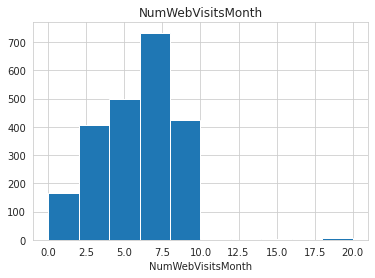

In [ ]:
for col in num_cols:
    num_summary(df, col, plot=True)